In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_excel("P:\Diamond_Pricing_Data.xlsx")
df

,Sr. No.,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326
2,3,0.23,Good,E,VS1,327
3,4,0.29,Premium,I,VS2,334
4,5,0.31,Good,J,SI2,335
...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,2757
53936,53937,0.72,Good,D,SI1,2757
53937,53938,0.70,Very Good,D,SI1,2757
53938,53939,0.86,Premium,H,SI2,2757


Text(0, 0.5, 'price')

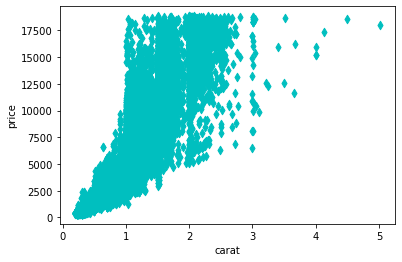

In [4]:
plt.scatter(df.carat,df.price,marker='d',color='c')
plt.xlabel('carat')
plt.ylabel('price')

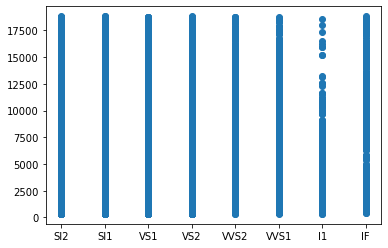

In [5]:
plt.scatter(df.clarity,df.price)

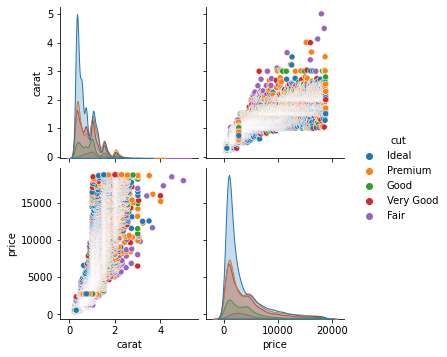

In [6]:
df=df.drop('Sr. No.',axis=1)
ax=sn.pairplot(df,hue='cut')

In [151]:
from sklearn.preprocessing import LabelEncoder
le_cut=LabelEncoder()
le_color=LabelEncoder()
le_clarity=LabelEncoder()

In [152]:
inputs=df.drop('price',axis=1)
target=df['price']
inputs

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


In [153]:
target

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [154]:
inputs['cut_n']=le_cut.fit_transform(inputs['cut'])
inputs['color_n']=le_color.fit_transform(inputs['color'])
inputs['clarity_n']=le_clarity.fit_transform(inputs['clarity'])
inputs

,carat,cut,color,clarity,cut_n,color_n,clarity_n
0,0.23,Ideal,E,SI2,2,1,3
1,0.21,Premium,E,SI1,3,1,2
2,0.23,Good,E,VS1,1,1,4
3,0.29,Premium,I,VS2,3,5,5
4,0.31,Good,J,SI2,1,6,3
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2,0,2
53936,0.72,Good,D,SI1,1,0,2
53937,0.70,Very Good,D,SI1,4,0,2
53938,0.86,Premium,H,SI2,3,4,3


In [155]:
inputs=inputs.drop(['cut','color','clarity'],axis=1)
inputs

,carat,cut_n,color_n,clarity_n
0,0.23,2,1,3
1,0.21,3,1,2
2,0.23,1,1,4
3,0.29,3,5,5
4,0.31,1,6,3
...,...,...,...,...
53935,0.72,2,0,2
53936,0.72,1,0,2
53937,0.70,4,0,2
53938,0.86,3,4,3


In [156]:
from xgboost import XGBRegressor

In [157]:
model = XGBRegressor(n_estimators=120, max_depth=7, eta=0.075, subsample=0.9, colsample_bytree=0.9)

In [158]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = XGBRegressor(n_estimators=120, max_depth=7, eta=0.075, subsample=0.9, colsample_bytree=0.9)
scores = cross_val_score(model, inputs, target, cv=cv )

In [159]:
print(scores)

[0.98113639 0.98044794 0.98150435 0.98068782 0.98072697 0.98143797
 0.98149653 0.98054988 0.98187297 0.98165248 0.98164639 0.98042256
 0.98326028 0.97999618 0.97905812 0.98064663 0.98075813 0.98149497
 0.98182851 0.98212023 0.98201239 0.98047206 0.98108865 0.98159346
 0.98204217 0.98192802 0.98166793 0.98082482 0.97911945 0.97998891]


In [160]:
mean(scores)

0.9811161052345599

In [161]:
model.fit(inputs,target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eta=0.075, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.075000003,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)